In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import nltk
import string
import plotly.express as px
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')


In [48]:
from google.colab import files
uploaded = files.upload()

Saving amazon_vfl_reviews.csv to amazon_vfl_reviews (2).csv


In [49]:
import io
df = pd.read_csv(io.BytesIO(uploaded['amazon_vfl_reviews.csv']))

In [50]:
df.head()

,asin,name,date,rating,review
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-06,1,I bought this hair oil after viewing so many g...
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-14,5,Used This Mama Earth Newly Launched Onion Oil ...
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-10-19,1,So bad product...My hair falling increase too ...
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-16,1,Product just smells similar to navarathna hair...
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-18,5,I have been trying different onion oil for my ...


In [51]:
df.shape

(2782, 5)

The dataset comprises of 2782 rows and 5 columns:-

asin : Amazon Standard Identification Number - a unique number for every product

name : Name of the product

date : Date on which review was posted

rating : Rating given to the product ( out of 5 )

review : Review given to the product

## Data cleaning

In [52]:
df.isna().sum()

asin      0
name      0
date      0
rating    0
review    4
dtype: int64

There are 4 null values in review column. we will drop these rows----

In [53]:
# droppring nullvalues
df = df.dropna()
# resetting the index
df = df.reset_index(drop=True)

In [54]:
df.shape

(2778, 5)

In [55]:
df

,asin,name,date,rating,review
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-06,1,I bought this hair oil after viewing so many g...
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-14,5,Used This Mama Earth Newly Launched Onion Oil ...
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-10-19,1,So bad product...My hair falling increase too ...
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-16,1,Product just smells similar to navarathna hair...
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-18,5,I have been trying different onion oil for my ...
...,...,...,...,...,...
2773,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2020-03-01,5,Long lasting freshness throughout the day.
2774,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2019-10-24,5,My preferred soap
2775,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2020-10-03,2,ठीक नहीं लगा
2776,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2019-06-21,4,Super Product


In [56]:
# Calculating sentiments
def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return 1
    elif (rating == 2) or (rating == 1):
        return 0
# Add sentiments to the data
df["Sentiment"] = df["rating"].apply(sentiments)
df["Sentiment"] = df["rating"].apply(sentiments)
df.head()


,asin,name,date,rating,review,Sentiment
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-06,1,I bought this hair oil after viewing so many g...,0.0
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-14,5,Used This Mama Earth Newly Launched Onion Oil ...,1.0
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-10-19,1,So bad product...My hair falling increase too ...,0.0
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-16,1,Product just smells similar to navarathna hair...,0.0
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-18,5,I have been trying different onion oil for my ...,1.0


In [57]:
df = df.dropna()

In [58]:
df.isnull().sum()

asin         0
name         0
date         0
rating       0
review       0
Sentiment    0
dtype: int64

In [59]:
df['rating'].value_counts()

5    1444
1     546
4     460
2     130
Name: rating, dtype: int64

In [60]:
df['Sentiment'].value_counts()

1.0    1904
0.0     676
Name: Sentiment, dtype: int64

0 refers to negative sentiment , 
1 refers to positive sentiment

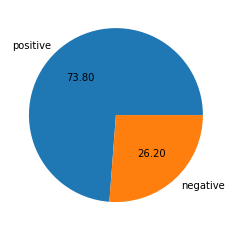

In [61]:
plt.pie(df['Sentiment'].value_counts(),labels=['positive','negative'],autopct='%0.2f')
plt.show()

Our dataset is imbalanced. 

In [62]:
df

,asin,name,date,rating,review,Sentiment
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-06,1,I bought this hair oil after viewing so many g...,0.0
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-14,5,Used This Mama Earth Newly Launched Onion Oil ...,1.0
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-10-19,1,So bad product...My hair falling increase too ...,0.0
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-16,1,Product just smells similar to navarathna hair...,0.0
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-18,5,I have been trying different onion oil for my ...,1.0
...,...,...,...,...,...,...
2773,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2020-03-01,5,Long lasting freshness throughout the day.,1.0
2774,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2019-10-24,5,My preferred soap,1.0
2775,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2020-10-03,2,ठीक नहीं लगा,0.0
2776,B07MVHJ6CH,Mysore-Sandal-Soaps-Pack-Bars,2019-06-21,4,Super Product,1.0


In [63]:
df.shape

(2580, 6)

In [64]:
df['name'].nunique()

122

we have 122 unique products in the dataset

In [65]:
df['name'].sample(n=5)

423      Titan-Analog-White-Dial-Watch-NK1639SL03
1511         Britannia-NutriChoice-Digestive-100g
749     Natural-Festive-Delight-Assorted-Jelimals
1137       Dettol-Disinfectant-Cleaner-Home-Fresh
2065                  Society-Tea-Masala-Jar-250g
Name: name, dtype: object

As we are observing that the first name in 'name' column is brand name. we can extract brandname from our 'name' column.

In [66]:
df['brandname'] = df['name'].str.split('-').str[0]
df.head()

,asin,name,date,rating,review,Sentiment,brandname
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-06,1,I bought this hair oil after viewing so many g...,0.0,Mamaearth
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-14,5,Used This Mama Earth Newly Launched Onion Oil ...,1.0,Mamaearth
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-10-19,1,So bad product...My hair falling increase too ...,0.0,Mamaearth
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-16,1,Product just smells similar to navarathna hair...,0.0,Mamaearth
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-18,5,I have been trying different onion oil for my ...,1.0,Mamaearth


In [67]:
df['brandname'].unique()

array(['Mamaearth', 'Godrej', 'Titan', 'Maaza', 'Paper', 'Indiana',
       'Coca', 'Natural', 'Maggi', 'Glucon', 'Amul', 'Patanjali',
       'PATANJALI', 'Dettol', 'Savlon', 'Cinthol', 'Britannia',
       'NutriChoice', 'Streax', 'Himalaya', 'Society', 'Tata', 'Fastrack',
       'Reflex', 'MYSORE', 'Mysore'], dtype=object)

We can see that there is some inconsistency in the brand names. PATANJALI and Patanjali are the same and same applies to MYSORE and Mysore. We will remove this incosistency.

In [68]:
df['brandname'] = df['brandname'].str.replace('PATANJALI','patanjali')
df['brandname'] = df['brandname'].str.replace('MYSORE','mysore')

In [69]:
len(df['brandname'].unique())

26

we have 26 unique brands

In [70]:
# Extracting the product name from 'name' column
products = []
for value in df['name']:
    indx = len(value.split('-')[0])+1
    products.append(value[indx:])
df['product'] = products
df['product'].nunique()

122

Now, we can remove 'name' column

In [71]:
df = df.drop(columns='name')
df.head()

,asin,date,rating,review,Sentiment,brandname,product
0,B07W7CTLD1,2019-09-06,1,I bought this hair oil after viewing so many g...,0.0,Mamaearth,Onion-Growth-Control-Redensyl
1,B07W7CTLD1,2019-08-14,5,Used This Mama Earth Newly Launched Onion Oil ...,1.0,Mamaearth,Onion-Growth-Control-Redensyl
2,B07W7CTLD1,2019-10-19,1,So bad product...My hair falling increase too ...,0.0,Mamaearth,Onion-Growth-Control-Redensyl
3,B07W7CTLD1,2019-09-16,1,Product just smells similar to navarathna hair...,0.0,Mamaearth,Onion-Growth-Control-Redensyl
4,B07W7CTLD1,2019-08-18,5,I have been trying different onion oil for my ...,1.0,Mamaearth,Onion-Growth-Control-Redensyl


In [72]:
# Dropping date column
df = df.drop(columns=['date','asin'])

In [73]:
df = df.drop(columns='rating')

In [74]:
df.head()

,review,Sentiment,brandname,product
0,I bought this hair oil after viewing so many g...,0.0,Mamaearth,Onion-Growth-Control-Redensyl
1,Used This Mama Earth Newly Launched Onion Oil ...,1.0,Mamaearth,Onion-Growth-Control-Redensyl
2,So bad product...My hair falling increase too ...,0.0,Mamaearth,Onion-Growth-Control-Redensyl
3,Product just smells similar to navarathna hair...,0.0,Mamaearth,Onion-Growth-Control-Redensyl
4,I have been trying different onion oil for my ...,1.0,Mamaearth,Onion-Growth-Control-Redensyl


In [75]:
df.duplicated().sum()

1478

In [76]:
df = df.drop_duplicates(keep='first')

In [77]:
df.shape

(1102, 4)

## EDA

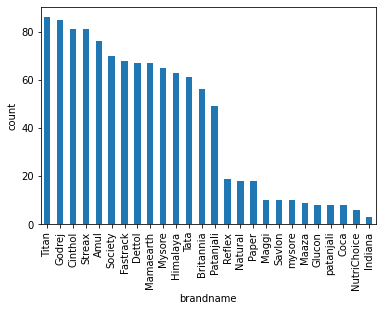

In [78]:
df.brandname.value_counts().plot(kind='bar',xlabel='brandname',ylabel='count')

As we can see that Titan, Godrej has more number of products.

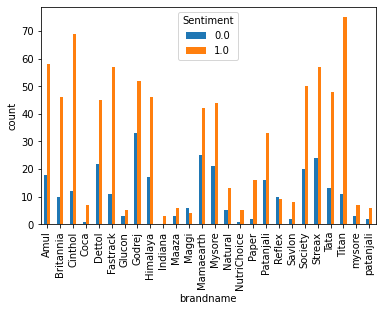

In [79]:
pd.crosstab(df.brandname,df.Sentiment).plot(kind='bar',ylabel='count')


As we can see that godrej brand has largest number of negative reviews. Titan and cinthol has largest number of positive reviews.

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1102 entries, 0 to 2769
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   review     1102 non-null   object 
 1   Sentiment  1102 non-null   float64
 2   brandname  1102 non-null   object 
 3   product    1102 non-null   object 
dtypes: float64(1), object(3)
memory usage: 43.0+ KB


In [81]:
# converting Sentiment column from float to int
df.Sentiment = df.Sentiment.astype(int)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1102 entries, 0 to 2769
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     1102 non-null   object
 1   Sentiment  1102 non-null   int64 
 2   brandname  1102 non-null   object
 3   product    1102 non-null   object
dtypes: int64(1), object(3)
memory usage: 43.0+ KB


In [83]:
df.sample(n=10)

,review,Sentiment,brandname,product
564,It's really good products,1,Titan,Analog-Gold-Dial-Watch-NK1650YM04
69,Mamaearth ubTAN Natural Face Wash is one the b...,1,Mamaearth,Natural-Turmeric-Saffron-brightning
242,Godrej No.1 Sandal Turmeric soaps are extremel...,1,Godrej,No-1-Bathing-Soap-Turmeric
2509,It’s a great watch at a reasonable price. I lo...,1,Fastrack,Casual-Analog-Grey-Watch-NK3121SL02
265,"Simply awesome...!Spacious, looks good, No iss...",1,Godrej,Direct-Cool-Refrigerator-1905-PTDI
1104,I mainly use this for spraying on bugs n spide...,1,Dettol,Disinfectant-Multi-Use-Hygiene-Liquid
1732,Good nice colour,1,Streax,Shampoo-Colour-Natural-Black-25-ml-Pack
1634,This is not the same product as advertised. I ...,0,Streax,Hair-Serum-Gloss-100ml
2585,Mysore Sandal is best talc ever in market.. Lo...,1,mysore,SANDAL-Mysore-Sandal-Talcum
2584,I have to thank the amazon recommendation engi...,1,mysore,SANDAL-Mysore-Sandal-Talcum


In [84]:
# characters in each review
df_num_characters = df['review'].apply(len)
df['num_characters'] = df_num_characters

In [85]:
df.head()

,review,Sentiment,brandname,product,num_characters
0,I bought this hair oil after viewing so many g...,0,Mamaearth,Onion-Growth-Control-Redensyl,477
1,Used This Mama Earth Newly Launched Onion Oil ...,1,Mamaearth,Onion-Growth-Control-Redensyl,495
2,So bad product...My hair falling increase too ...,0,Mamaearth,Onion-Growth-Control-Redensyl,149
3,Product just smells similar to navarathna hair...,0,Mamaearth,Onion-Growth-Control-Redensyl,518
4,I have been trying different onion oil for my ...,1,Mamaearth,Onion-Growth-Control-Redensyl,360


In [86]:
import nltk
nltk.download('punkt')
# words in each review
df['num_words'] = df['review'].apply(lambda x:len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [87]:
df.head()

,review,Sentiment,brandname,product,num_characters,num_words
0,I bought this hair oil after viewing so many g...,0,Mamaearth,Onion-Growth-Control-Redensyl,477,100
1,Used This Mama Earth Newly Launched Onion Oil ...,1,Mamaearth,Onion-Growth-Control-Redensyl,495,94
2,So bad product...My hair falling increase too ...,0,Mamaearth,Onion-Growth-Control-Redensyl,149,28
3,Product just smells similar to navarathna hair...,0,Mamaearth,Onion-Growth-Control-Redensyl,518,96
4,I have been trying different onion oil for my ...,1,Mamaearth,Onion-Growth-Control-Redensyl,360,70


In [88]:
# sentences in each review
df['num_sentences'] = df['review'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [89]:
df.head()

,review,Sentiment,brandname,product,num_characters,num_words,num_sentences
0,I bought this hair oil after viewing so many g...,0,Mamaearth,Onion-Growth-Control-Redensyl,477,100,6
1,Used This Mama Earth Newly Launched Onion Oil ...,1,Mamaearth,Onion-Growth-Control-Redensyl,495,94,2
2,So bad product...My hair falling increase too ...,0,Mamaearth,Onion-Growth-Control-Redensyl,149,28,1
3,Product just smells similar to navarathna hair...,0,Mamaearth,Onion-Growth-Control-Redensyl,518,96,2
4,I have been trying different onion oil for my ...,1,Mamaearth,Onion-Growth-Control-Redensyl,360,70,5


In [90]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1102.000000,1102.000000,1102.000000
mean,209.017241,42.236842,2.733212
std,235.523709,47.233368,2.527517
min,1.000000,1.000000,1.000000
25%,51.000000,10.000000,1.000000
50%,142.500000,29.000000,2.000000
75%,289.000000,58.000000,4.000000
max,2180.000000,399.000000,22.000000


average number of characters in each review is 209. average number of words in each review is 42 and average number of sentences in each review is 3.

In [91]:
df.head()

,review,Sentiment,brandname,product,num_characters,num_words,num_sentences
0,I bought this hair oil after viewing so many g...,0,Mamaearth,Onion-Growth-Control-Redensyl,477,100,6
1,Used This Mama Earth Newly Launched Onion Oil ...,1,Mamaearth,Onion-Growth-Control-Redensyl,495,94,2
2,So bad product...My hair falling increase too ...,0,Mamaearth,Onion-Growth-Control-Redensyl,149,28,1
3,Product just smells similar to navarathna hair...,0,Mamaearth,Onion-Growth-Control-Redensyl,518,96,2
4,I have been trying different onion oil for my ...,1,Mamaearth,Onion-Growth-Control-Redensyl,360,70,5


<function matplotlib.pyplot.show>

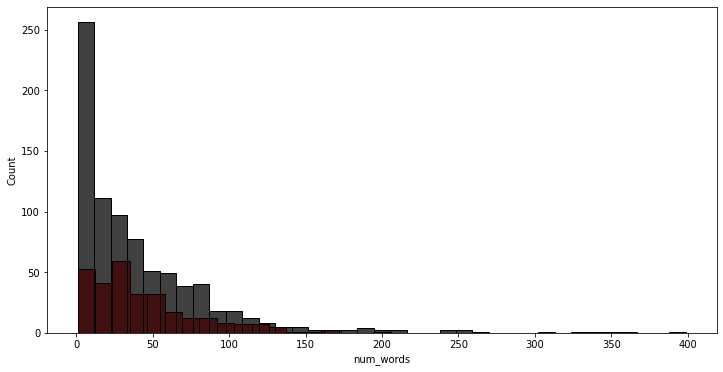

In [92]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['Sentiment'] == 0]['num_words'],color='red')
sns.histplot(df[df['Sentiment'] == 1]['num_words'],color='black')
plt.show

<function matplotlib.pyplot.show>

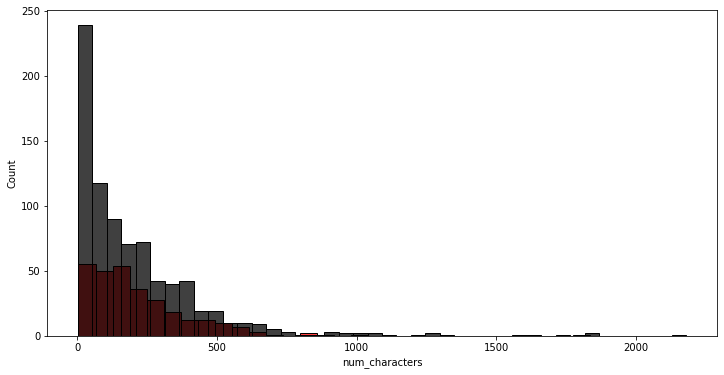

In [93]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Sentiment'] == 0]['num_characters'],color='red')
sns.histplot(df[df['Sentiment'] == 1]['num_characters'],color='black')
plt.show

## Text preprocessing

In [94]:
df = df.drop(columns=['num_words','num_sentences'])

In [95]:
# converting in lower case
# tokenization
# removing special characters
# removing stopwords and punctuations
# stemming
nltk.download('stopwords')
from nltk.corpus import stopwords
stp = stopwords.words('english')
import string
sr = string.punctuation
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [99]:
def transform_review(review):
# converting in lower case
  review = review.lower()
# tokenization
  review = nltk.word_tokenize(review)
# removing special characters
  y=[]
  for i in review:
    if i.isalnum():
      y.append(i)
  review = y[:]
  y.clear()
# removing stopwords and punctuations
  for i in review:
    if i not in stp and i not in sr:
      y.append(i)
  review = y[:]
  y.clear()
  for i in review:
    y.append(ps.stem(i))
  return ' '.join(y)



In [100]:
df['transformed_review'] = df['review'].apply(transform_review)

In [101]:
df.head()

,review,Sentiment,brandname,product,num_characters,transformed_review
0,I bought this hair oil after viewing so many g...,0,Mamaearth,Onion-Growth-Control-Redensyl,477,bought hair oil view mani good comment product...
1,Used This Mama Earth Newly Launched Onion Oil ...,1,Mamaearth,Onion-Growth-Control-Redensyl,495,use mama earth newli launch onion oil twice mu...
2,So bad product...My hair falling increase too ...,0,Mamaearth,Onion-Growth-Control-Redensyl,149,bad product hair fall increas order shampoo ma...
3,Product just smells similar to navarathna hair...,0,Mamaearth,Onion-Growth-Control-Redensyl,518,product smell similar navarathna hair oil stro...
4,I have been trying different onion oil for my ...,1,Mamaearth,Onion-Growth-Control-Redensyl,360,tri differ onion oil hair hair healthi product...


In [102]:
# wordcloud 
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [104]:
positive_wc = wc.generate(df[df['Sentiment']==1]['transformed_review'].str.cat(sep=' '))

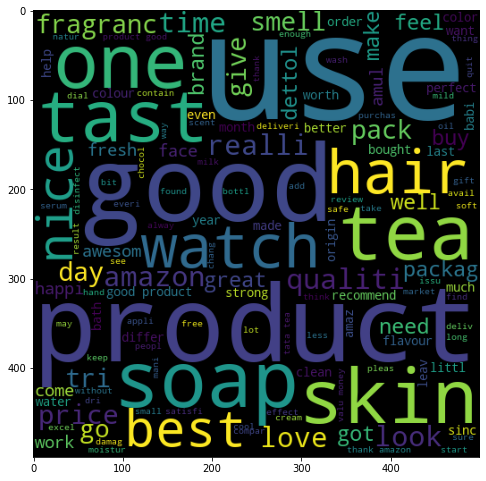

In [108]:
# plotting positive reviews wordcloud
plt.figure(figsize=(8,12))
plt.imshow(positive_wc)

As we can see that in positive reviews words like good, product, use, tea, use, like,best, etc are most common words.

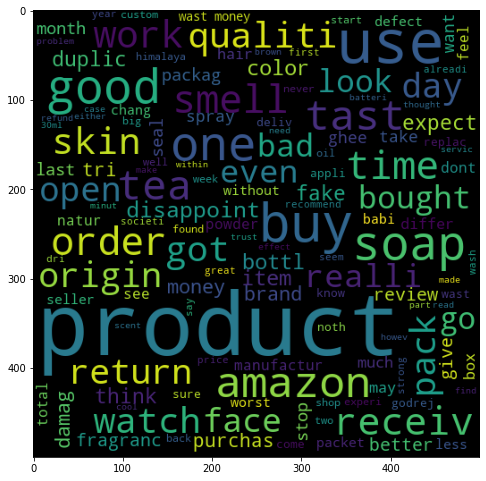

In [110]:
# plotting negative reviews wordcloud
negative_wc = wc.generate(df[df['Sentiment']==0]['transformed_review'].str.cat(sep=' '))
plt.figure(figsize=(8,12))
plt.imshow(negative_wc)

As we can see that in negative reviews words like return,tast,smell, etc are most common words.

In [138]:
# Top 20 words in positive reviews
positive_corpus = []
for review in df[df['Sentiment'] == 1]['transformed_review'].tolist():  # here making list of positive reviews 
  for word in review.split():
    positive_corpus.append(word)

In [112]:
len(positive_corpus)

15831

All positive reviews contain 15831 words

In [113]:
from collections import Counter

In [114]:
# Top 20 words in positive reviews
pd.DataFrame(Counter(positive_corpus).most_common(20))


,0,1
0,product,384
1,good,366
2,use,295
3,tea,186
4,skin,146
5,like,145
6,one,143
7,soap,136
8,best,122
9,amazon,114


In [115]:
negative_corpus = []
for review in df[df['Sentiment'] == 0]['transformed_review'].tolist():  # here making list of negative reviews
  for word in review.split():
    negative_corpus.append(word)

In [116]:
len(negative_corpus)

5971

All negative reviews contain 5971 words

In [117]:
# Top 20 words in negative reviews
pd.DataFrame(Counter(negative_corpus).most_common(20))

,0,1
0,product,223
1,use,87
2,like,81
3,buy,74
4,good,53
5,soap,53
6,one,52
7,smell,44
8,amazon,44
9,tast,41


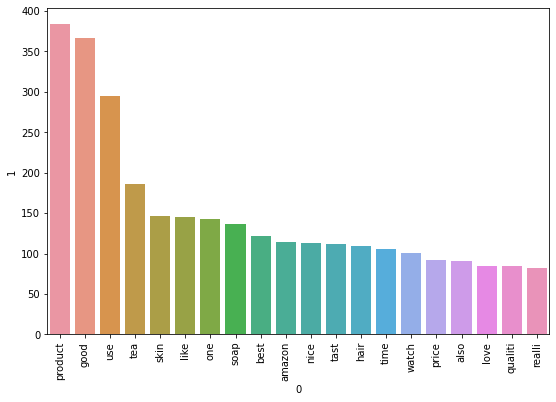

In [118]:
plt.figure(figsize=(9,6))
sns.barplot(pd.DataFrame(Counter(positive_corpus).most_common(20))[0],pd.DataFrame(Counter(positive_corpus).most_common(20))[1])
plt.xticks(rotation='vertical')
plt.show()

This is the frequency of top words in positive reviews

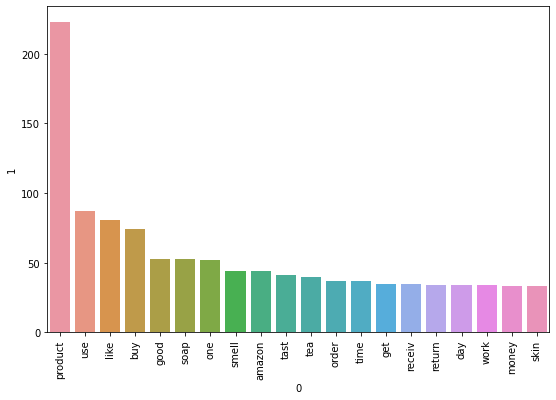

In [119]:
plt.figure(figsize=(9,6))
sns.barplot(pd.DataFrame(Counter(negative_corpus).most_common(20))[0],pd.DataFrame(Counter(negative_corpus).most_common(20))[1])
plt.xticks(rotation='vertical')
plt.show()

This is the frequency of top words in negative reviews

## Modelling

In [120]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

#### Trying Bag of words

In [121]:
x = cv.fit_transform(df['transformed_review']).toarray()
x.shape

(1102, 3261)

In [122]:
y = df['Sentiment'].values
y

array([0, 1, 0, ..., 0, 1, 1])

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,accuracy_score,f1_score,recall_score
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_predict

In [124]:
lr = LogisticRegression()
mnb = MultinomialNB()
gnb = GaussianNB()
bnb = BernoulliNB()
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()
adb = AdaBoostClassifier()
xgb = XGBClassifier()

In [125]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [126]:
clfs = {
    'lr':lr,
    'mnb':mnb,
    'gnb':gnb,
    'bnb':bnb,
    'knn':knn,
    'rfc':rfc,
    'adb':adb,
    'xgb':xgb
}

In [127]:
def train_classifier(clf,X_train,Y_train,X_test,Y_test):
  clf.fit(X_train,Y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(Y_test,y_pred)
  precision = precision_score(Y_test,y_pred)
  recall = recall_score(Y_test,y_pred)
  f1 = f1_score(Y_test,y_pred)
  return accuracy,precision,recall,f1

In [128]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision,current_recall,current_f1 = train_classifier(clf, x_train,y_train,x_test,y_test)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f1_scores.append(current_f1)

In [129]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'Recall':recall_scores,'F1 score':f1_scores}).sort_values('Precision',ascending=False)

In [130]:
performance_df

,Algorithm,Accuracy,Precision,Recall,F1 score
1,mnb,0.850679,0.864407,0.944444,0.902655
6,adb,0.837104,0.838710,0.962963,0.896552
5,rfc,0.828054,0.836957,0.950617,0.890173
0,lr,0.819005,0.821053,0.962963,0.886364
7,xgb,0.819005,0.817708,0.969136,0.887006
3,bnb,0.778281,0.792746,0.944444,0.861972
4,knn,0.760181,0.763285,0.975309,0.856369
2,gnb,0.556561,0.728571,0.629630,0.675497


#### Trying Tfidf

In [132]:
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(df['transformed_review']).toarray()
x.shape

(1102, 3261)

In [133]:
y = df['Sentiment'].values
y

array([0, 1, 0, ..., 0, 1, 1])

In [134]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [135]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision,current_recall,current_f1 = train_classifier(clf, x_train,y_train,x_test,y_test)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f1_scores.append(current_f1)

In [136]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'Recall':recall_scores,'F1 score':f1_scores}).sort_values('Precision',ascending=False)

In [137]:
performance_df

,Algorithm,Accuracy,Precision,Recall,F1 score
6,adb,0.823529,0.839779,0.938272,0.886297
5,rfc,0.814480,0.804020,0.987654,0.886427
7,xgb,0.809955,0.803030,0.981481,0.883333
3,bnb,0.778281,0.792746,0.944444,0.861972
0,lr,0.764706,0.759434,0.993827,0.860963
1,mnb,0.737557,0.736364,1.000000,0.848168
4,knn,0.728507,0.731818,0.993827,0.842932
2,gnb,0.556561,0.725352,0.635802,0.677632
